In [1]:
#!pip install pandas numpy scipy kaleido==0.2.1 matplotlib pyarrow pooch seaborn plotly xarray ipywidgets

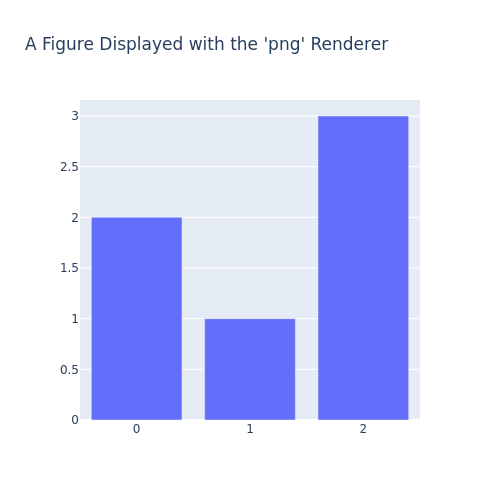

In [2]:
import plotly.io as pio
png_renderer = pio.renderers["png"]
png_renderer.width = 500
png_renderer.height = 500

pio.renderers.default = "png"

import plotly.graph_objects as go
fig = go.Figure(
    data=[go.Bar(y=[2, 1, 3])],
    layout_title_text="A Figure Displayed with the 'png' Renderer"
)
fig.show()

In [3]:
import plotly.express as px
import xarray as xr
from IPython.display import Image
from matplotlib import pyplot as plt
import random
import numpy as np

In [4]:
import pandas as pd
# uncomment to add 2024 year to 2007-2025 
hourly_df = pd.read_parquet('./oasis_07_25_ML_CUDA_v03.parquet')
#df2025 = pd.read_csv("2025_nsphourly.csv", parse_dates=["datetime"])
#hourly_df = pd.concat([hourly_df4, df2025], ignore_index=True, sort=True)
hourly_df.index = pd.to_datetime(hourly_df['datetime'])
#hourly_df = hourly_df.sort_index()

In [5]:
# there was a ' ' missing datapoint 
# (not null, but with a space that caused the dtype of the column to be object), fixed manually by deleting it.
#df2025['load_MW'] = df2025['load_MW'].astype(float)

In [6]:
hourly_df

,datetime,hour_index,load_MW
datetime,,,
2007-01-01 00:00:00,2007-01-01 00:00:00,1,1580.00
2007-01-01 01:00:00,2007-01-01 01:00:00,2,1533.00
2007-01-01 02:00:00,2007-01-01 02:00:00,3,1495.00
2007-01-01 03:00:00,2007-01-01 03:00:00,4,1446.00
2007-01-01 04:00:00,2007-01-01 04:00:00,5,1406.00
...,...,...,...
2025-12-31 19:00:00,2025-12-31 19:00:00,8755,1536.32
2025-12-31 20:00:00,2025-12-31 20:00:00,8756,1514.64
2025-12-31 21:00:00,2025-12-31 21:00:00,8757,1492.80


In [7]:
#hourly_df.to_parquet('./oasis_07_25.parquet', compression=None)

In [8]:
#hourly_df2 = pd.read_parquet('./oasis_07_25.parquet')
#hourly_df2

In [9]:
oasis2 = hourly_df[['datetime','load_MW']]

In [10]:
import seaborn as sns

In [11]:
df = oasis2.copy()
df['hour'] = df.datetime.dt.hour
df['month'] = df.datetime.dt.month
df['year'] = df.datetime.dt.year
df['day'] = df.datetime.dt.day
df['date'] = df.datetime.dt.date
df['weekdayName'] = df.datetime.dt.day_name() # df.date.dt.weekday_name on older Pandas
df['weekday'] = df.datetime.dt.weekday
#df['week'] = df.datetime.dt.week
df['weekend'] = df.datetime.dt.weekday // 5 == 1

In [12]:
import calendar
hour_abbr = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
all_month_year_df = pd.pivot_table(df, values="load_MW",index=["hour"],
                                   columns=["month"],
                                   fill_value=0,
                                   margins=True)
named_index = [[hour_abbr[i] if isinstance(i, int) else i for i in list(all_month_year_df.index)]]
all_month_year_df = all_month_year_df.set_index(named_index)
all_month_year_df

month,1,2,3,4,5,6,7,8,9,10,11,12,All
0,1512.809049,1531.777858,1405.514958,1217.526632,1085.618879,1035.825456,1083.001154,1097.035399,1025.291193,1077.570679,1247.306386,1421.498618,1227.102095
1,1471.676587,1499.228976,1378.967267,1183.558737,1036.376859,972.772281,1015.132343,1033.271392,969.898298,1027.212716,1199.818144,1372.665416,1178.738806
2,1442.086061,1470.380912,1352.945419,1154.606175,1002.140000,927.607158,965.976944,984.231528,927.624860,987.456469,1157.067445,1329.496763,1140.381201
3,1420.516265,1451.815419,1332.241080,1135.430544,983.271664,907.468895,944.235263,961.894652,910.340667,968.821222,1139.781140,1305.287233,1119.905395
4,1413.143226,1448.085177,1327.225450,1132.157246,979.109474,900.054526,933.218778,951.042428,903.413667,962.919610,1134.124263,1297.052411,1113.703901
5,1420.984992,1460.143017,1335.837063,1143.509175,987.831647,902.489263,931.298744,949.526825,906.275105,970.324924,1145.574684,1306.567997,1120.225866
6,1459.144686,1499.873892,1373.971154,1182.034333,1016.868421,917.889333,945.045297,967.492462,933.744649,1006.480883,1187.044982,1346.769610,1151.502719
7,1553.221851,1594.786331,1464.463430,1270.063439,1087.362479,983.985684,992.515993,1011.874975,1007.534140,1097.543905,1282.595930,1433.710323,1229.964056
8,1644.230051,1679.696518,1547.498149,1354.550368,1176.103226,1083.766439,1079.549168,1090.559847,1091.304351,1195.726808,1371.104702,1519.427946,1317.793061
9,1687.181511,1713.808696,1583.912988,1390.936404,1222.653684,1145.874193,1158.546112,1167.549440,1144.477421,1238.597012,1405.989105,1568.872699,1367.514532


In [13]:
def plot_heatmap_year3(year):
    #plt.figure(figsize = (30, 6))
    allByYear_df = df.loc[df['year'] == year]
    allByYear_df = pd.pivot_table(allByYear_df, values="load_MW",
                                  index=["hour"], columns=["date"], fill_value=None)
    allByYear_df = allByYear_df.set_index([[hour_abbr[i] for i in list(allByYear_df.index)]])

    return allByYear_df

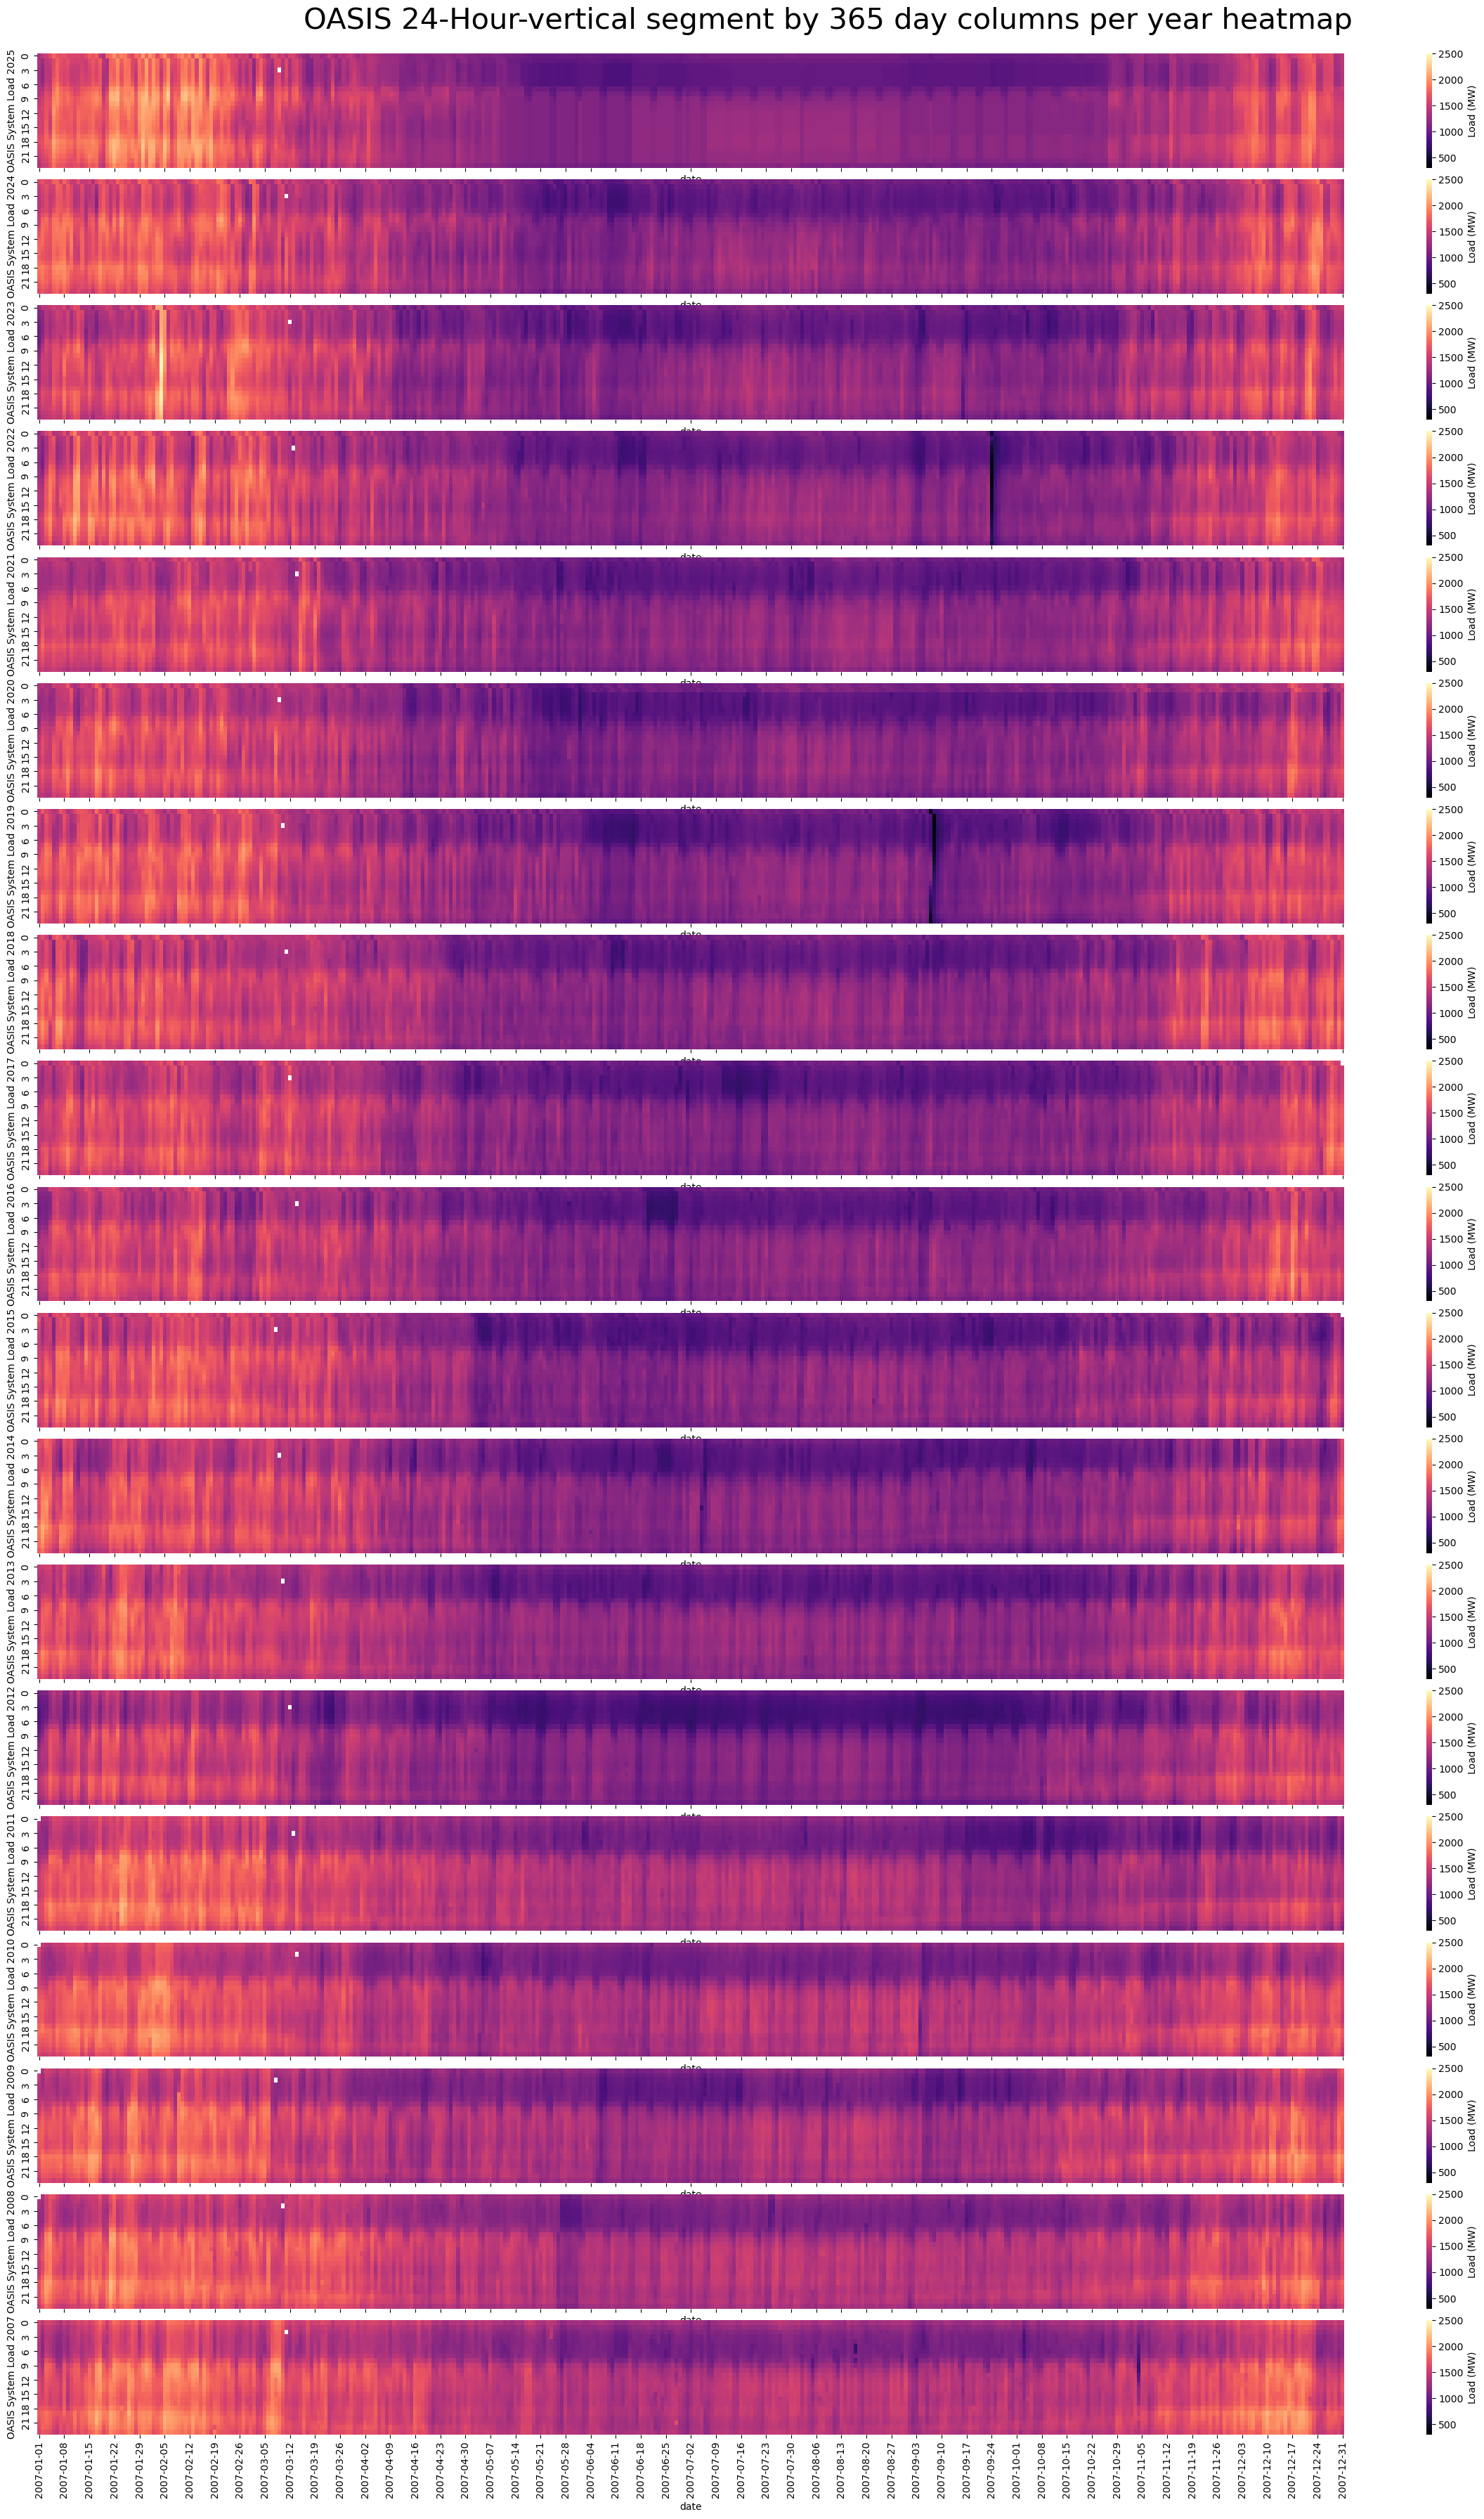

In [14]:
#date_form = mdates.DateFormatter("%b-%d")

fig, axs3 = plt.subplots(19, figsize=(30,44),
                        sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0.1, 'wspace': .1})

fig.suptitle('OASIS 24-Hour-vertical segment by 365 day columns per year heatmap', y=0.895, ha='center', fontsize=30)

sns.heatmap(ax=axs3[0], data=plot_heatmap_year3(2025), cmap = 'magma', xticklabels=7,
                     vmin=300, vmax=2500, #vmin=900, vmax=1700,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Load (MW)'})

sns.heatmap(ax=axs3[1], data=plot_heatmap_year3(2024), cmap = 'magma', xticklabels=7,
                     vmin=300, vmax=2500, #vmin=900, vmax=1700,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Load (MW)'})

sns.heatmap(ax=axs3[2], data=plot_heatmap_year3(2023), cmap = 'magma', xticklabels=7,
                     vmin=300, vmax=2500, #vmin=900, vmax=1700,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Load (MW)'})

sns.heatmap(ax=axs3[3], data=plot_heatmap_year3(2022), cmap = 'magma', xticklabels=7,
                     vmin=300, vmax=2500, #vmin=900, vmax=1700,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Load (MW)'})
                     #annot_kws={"size": 2}, square=True, cbar_kws={"shrink": .48, 'label': 'Load (MW)'})

sns.heatmap(ax=axs3[4], data=plot_heatmap_year3(2021), cmap = 'magma', xticklabels=7,
                     vmin=300, vmax=2500, #vmin=900, vmax=1700,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Load (MW)'})

sns.heatmap(ax=axs3[5], data=plot_heatmap_year3(2020), cmap = 'magma', xticklabels=7,
                     vmin=300, vmax=2500, #vmin=900, vmax=1700,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Load (MW)'})

sns.heatmap(ax=axs3[6], data=plot_heatmap_year3(2019), cmap = 'magma', xticklabels=7,
                     vmin=300, vmax=2500, #vmin=900, vmax=1700,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Load (MW)'})

sns.heatmap(ax=axs3[7], data=plot_heatmap_year3(2018), cmap = 'magma', xticklabels=7,
                     vmin=300, vmax=2500, #vmin=900, vmax=1700,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Load (MW)'})

sns.heatmap(ax=axs3[8], data=plot_heatmap_year3(2017), cmap = 'magma', xticklabels=7,
                     vmin=300, vmax=2500, #vmin=900, vmax=1700,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Load (MW)'})

sns.heatmap(ax=axs3[9], data=plot_heatmap_year3(2016), cmap = 'magma', xticklabels=7,
                     vmin=300, vmax=2500, #vmin=900, vmax=1700,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Load (MW)'})

sns.heatmap(ax=axs3[10], data=plot_heatmap_year3(2015), cmap = 'magma', xticklabels=7,
                     vmin=300, vmax=2500, #vmin=900, vmax=1700,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Load (MW)'})

sns.heatmap(ax=axs3[11], data=plot_heatmap_year3(2014), cmap = 'magma', xticklabels=7,
                     vmin=300, vmax=2500, #vmin=900, vmax=1700,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Load (MW)'})

sns.heatmap(ax=axs3[12], data=plot_heatmap_year3(2013), cmap = 'magma', xticklabels=7,
                     vmin=300, vmax=2500, #vmin=900, vmax=1700,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Load (MW)'})

sns.heatmap(ax=axs3[13], data=plot_heatmap_year3(2012), cmap = 'magma', xticklabels=7,
                     vmin=300, vmax=2500, #vmin=900, vmax=1700,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Load (MW)'})

sns.heatmap(ax=axs3[14], data=plot_heatmap_year3(2011), cmap = 'magma', xticklabels=7,
                     vmin=300, vmax=2500, #vmin=900, vmax=1700,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Load (MW)'})

sns.heatmap(ax=axs3[15], data=plot_heatmap_year3(2010), cmap = 'magma', xticklabels=7,
                     vmin=300, vmax=2500, #vmin=900, vmax=1700,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Load (MW)'})

sns.heatmap(ax=axs3[16], data=plot_heatmap_year3(2009), cmap = 'magma', xticklabels=7,
                     vmin=300, vmax=2500, #vmin=900, vmax=1700,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Load (MW)'})

sns.heatmap(ax=axs3[17], data=plot_heatmap_year3(2008), cmap = 'magma', xticklabels=7,
                     vmin=300, vmax=2500, #vmin=900, vmax=1700,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Load (MW)'})

sns.heatmap(ax=axs3[18], data=plot_heatmap_year3(2007), cmap = 'magma', xticklabels=7,
                     vmin=300, vmax=2500, #vmin=900, vmax=1700,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Load (MW)'})


yearlist = [2025, 2024, 2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007]

for year, ax in enumerate(axs3.flat):
    ax.set(ylabel=f'OASIS System Load {yearlist[year]}')#, title='OASIS 24-Hour-vertical segment by 365 day columns per year heatmap')

plt.savefig(fname = "oasis_hourly_figure03a_ML_CUDA_95_randomforest.png", \
                    dpi=125,
                    bbox_inches='tight')